In [6]:
import pandas as pd

# Specify the file name
df = pd.read_csv('palestina22-28octv2.csv', delimiter = ';')

df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Oct 27 23:59:57 +0000 2023,1718054960670339480,@NyaiiBubu @convomfs dan itulah cikal bakal de...,0,0,0,0,in,910874784082182144,1717851330159718639,Indro51903809,https://twitter.com/Indro51903809/status/17180...
1,Fri Oct 27 23:59:32 +0000 2023,1718054857054224713,@SammiSoh Tolol kalian semua. Ini bukan soal a...,0,0,0,0,in,2177741178,1717904350645997715,rajaonan,https://twitter.com/rajaonan/status/1718054857...
2,Fri Oct 27 23:58:46 +0000 2023,1718054662740607263,Tiap hari nangisin palestina 😭 kek ya Allahhh,0,0,0,0,in,1110834572449599488,1718054662740607263,brownsyugerrr,https://twitter.com/brownsyugerrr/status/17180...
3,Fri Oct 27 23:58:05 +0000 2023,1718054490824429879,Kapan berhenti membombardir Palestina oleh Isr...,0,0,0,0,in,439068414,1718054490824429879,DesvionitaVivin,https://twitter.com/DesvionitaVivin/status/171...
4,Fri Oct 27 23:58:04 +0000 2023,1718054486621728956,Ini adl panggilan dr saudara2mu dn keluargamu ...,0,0,0,0,in,1669586043979575296,1718054486621728956,NessySuhu21963,https://twitter.com/NessySuhu21963/status/1718...


In [14]:
x = df[['full_text', 'username']]

x.head()

,full_text,username
0,@NyaiiBubu @convomfs dan itulah cikal bakal de...,Indro51903809
1,@SammiSoh Tolol kalian semua. Ini bukan soal a...,rajaonan
2,Tiap hari nangisin palestina 😭 kek ya Allahhh,brownsyugerrr
3,Kapan berhenti membombardir Palestina oleh Isr...,DesvionitaVivin
4,Ini adl panggilan dr saudara2mu dn keluargamu ...,NessySuhu21963


In [39]:
import pandas as pd
import re

# Baca data dari file CSV
df = pd.read_csv('palestina22-28octv2.csv', delimiter = ';')

# List untuk menyimpan tweet yang mengandung tag '@' dan usernamenya
tagged_tweets = []

# Ekstraksi tweet yang mengandung tag '@' dan usernamenya
for index, row in df.iterrows():
    full_text = row['full_text']
    username = row['username']

    # Gunakan ekspresi reguler untuk mencari tag '@' dan usernamenya
    mentions = re.findall(r'@(\w+)', full_text)

    # Jika ada tag '@', tambahkan ke list tagged_tweets
    if mentions:
        for mention in mentions:
            tagged_tweets.append({'username': username, 'target': mention})

# Buat DataFrame dari list tagged_tweets
result_df = pd.DataFrame(tagged_tweets)

result_df.to_csv('hasil_akhir.csv', index=False, sep=';')

In [48]:
import pandas as pd
import re

# Baca data dari file CSV
df = pd.read_csv('palestina22-28octv2.csv', delimiter = ';')  # Ganti 'nama_file.csv' dengan nama file CSV sebenarnya

# List untuk menyimpan tweet yang mengandung tag '@' dan usernamenya
tagged_tweets = []

# Ekstraksi tweet yang mengandung tag '@' dan usernamenya
for index, row in df.iterrows():
    full_text = row['full_text']
    username = row['username']

    # Gunakan ekspresi reguler untuk mencari tag '@' dan usernamenya
    mentions = re.findall(r'@(\w+)', full_text)

    # Jika ada tag '@', tambahkan ke list tagged_tweets
    if mentions:
        for mention in mentions:
            tagged_tweets.append({'source': username, 'target': mention})

# Buat DataFrame dari list tagged_tweets
result_df = pd.DataFrame(tagged_tweets)

# Export hasil akhir ke dalam file CSV dengan delimiter ;
result_df.to_csv('hasil_akhir.csv', index=False, sep=';')  # Ganti 'hasil_akhir.csv' dengan nama file CSV yang diinginkan

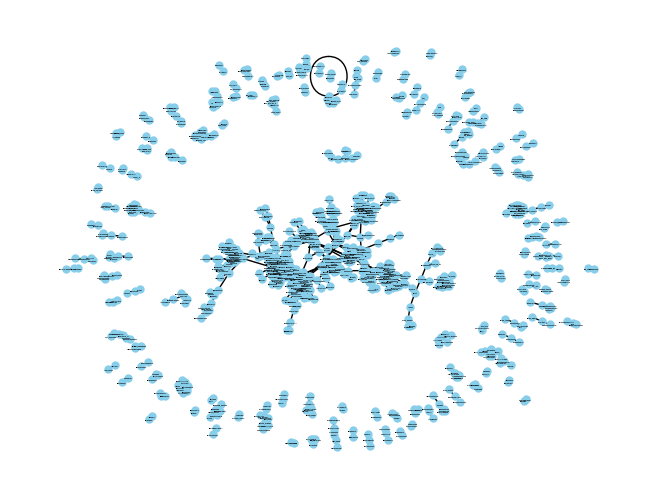

In [59]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Baca data dari file CSV
df = pd.read_csv('hasil_akhir.csv', delimiter = ';')  # Ganti 'nama_file.csv' dengan nama file CSV yang sesuai


# Buat objek graf dari DataFrame
G = nx.from_pandas_edgelist(df, 'source', 'target')

# Visualisasikan graf
pos = nx.spring_layout(G)  # Anda dapat mengganti algoritma penataan sesuai keinginan
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

# Tampilkan plot
plt.show()

In [65]:
import pandas as pd
import re

# Baca data dari file CSV
df = pd.read_csv('palestina22-28octv2.csv', delimiter = ';')  # Ganti 'nama_file.csv' dengan nama file CSV sebenarnya

# List untuk menyimpan tweet yang mengandung tag '@' dan usernamenya
tagged_tweets = []

# Ekstraksi tweet yang mengandung tag '@' dan usernamenya
for index, row in df.iterrows():
    full_text = row['full_text']
    username = row['username']

    # Gunakan ekspresi reguler untuk mencari tag '@' dan usernamenya
    mentions = re.findall(r'@(\w+)', full_text)

    # Jika ada tag '@', tambahkan ke list tagged_tweets
    if mentions:
        for mention in mentions:
            tagged_tweets.append({'source': username, 'target': mention, 'full_text': full_text})

# Buat DataFrame dari list tagged_tweets
result_df = pd.DataFrame(tagged_tweets)

# Hitung jumlah kemunculan setiap pasangan (source, target)
mention_counts = result_df.groupby(['source', 'target']).size().reset_index(name='count')

# Filter baris yang memiliki frekuensi kurang dari 3
filtered_mention_counts = mention_counts[mention_counts['count'] >= 3]

# Gabungkan DataFrame hasil akhir dengan DataFrame yang difilter
result_df = pd.merge(result_df, filtered_mention_counts, on=['source', 'target'], how='inner')

# Hapus kolom yang tidak diperlukan
result_df.drop(columns=['full_text', 'count'], inplace=True)

# Export hasil akhir ke dalam file CSV dengan delimiter ;
result_df.to_csv('hasil_akhir.csv', index=False, sep=';')  # Ganti 'hasil_akhir.csv' dengan nama file CSV yang diinginkan


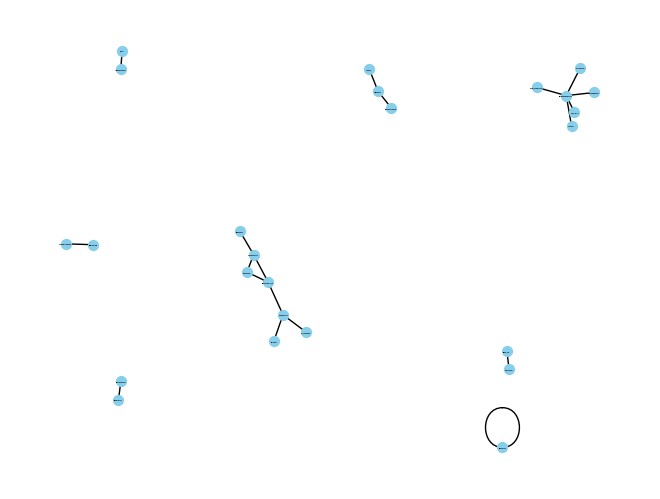

In [67]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Baca data dari file CSV
df = pd.read_csv('hasil_akhir.csv', delimiter = ';')  # Ganti 'nama_file.csv' dengan nama file CSV yang sesuai


# Buat objek graf dari DataFrame
G = nx.from_pandas_edgelist(df, 'source', 'target')

# Visualisasikan graf
pos = nx.spring_layout(G)  # Anda dapat mengganti algoritma penataan sesuai keinginan
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=50, node_color='skyblue', font_size=0)

# Tampilkan plot
plt.show()